## PREDICTION USING UNSUPERVISED MACHINE LEARNING

**GRIP JUNE 2023: TASK-2 PREDICTING OPTIMAL NO. OF CLUSTERS IN IRIS DATASET**

**Problem Statement**


---


The Iris flower data set or Fisher's Iris data set is a multivariate data set To quantify the morphologic variation of Iris flowers of three related species.Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

**Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.**Based on the combination of these four features, we have to distinguish the species from each other.

**Task Objective**

---


One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. We need to identify and create the number of clusters w.r.t. the Sepal and Petal features and visually identify which species belong to which class according to their linearity.


**Steps**


---

1. Understanding the data
2. EDA
3.Prepare the data for modelling
4. K-Means

In [ ]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import datasets

In [ ]:
#loading the dataset
iris_df = pd.read_csv("/content/Iris.csv")

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

1. data has no missing values
2. It has 4 float and 1 categorical columns
3. drpping id which is of no use

In [ ]:
iris_df.drop(['Id'],axis=1,  inplace=True)

In [ ]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.Species.value_counts(normalize=True)*100

Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: Species, dtype: float64

Equal class distribution in the dataset

**EDA**

In [ ]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<ipython-input-60-538cc1eda2df>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-60-538cc1eda2df>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-60-538cc1eda2df>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

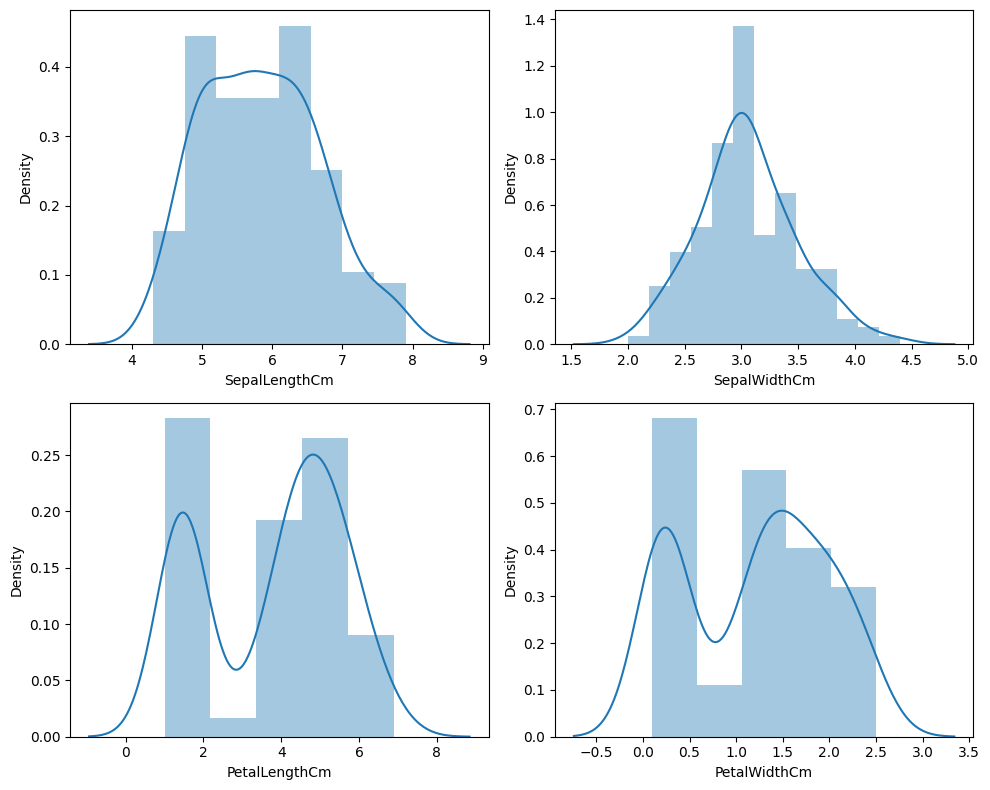

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(10, 8))

for n, col in enumerate(cols, 1):
    plt.subplot(2, 2, n)
    sns.distplot(iris_df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()



We see a normal ditribution of sepal width and length but not petal length and width


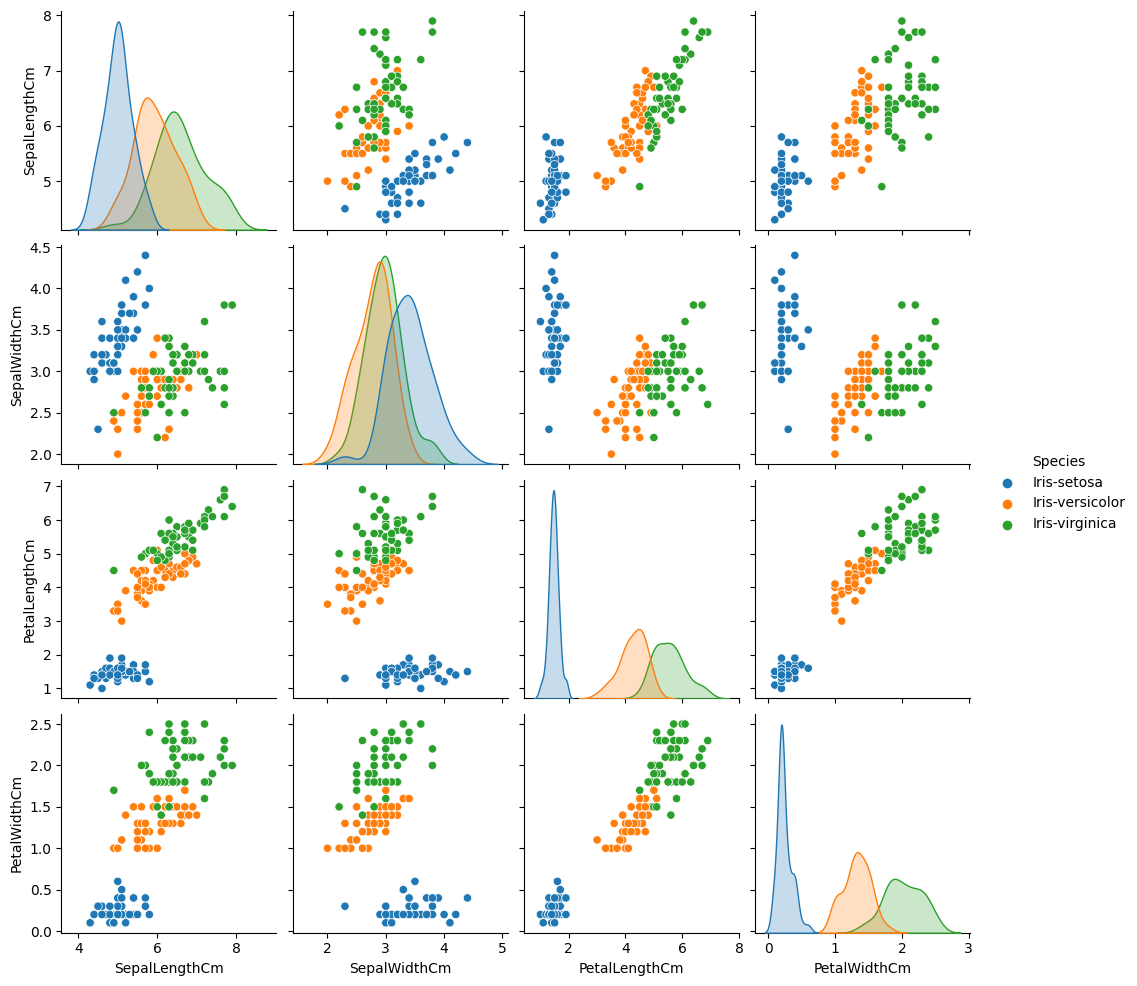

In [ ]:
sns.pairplot(iris_df,hue='Species')

1. Petal length and PETAL WIDTH ARE POSITIVELY CORRELLATED
2. Iris setosa can be easily distinguished
3. but the virginica and versicolor are mixed therefore it is a bit difficult to seperate. Furthermore there features are diffrenet and versicolor show greater range as compared to versicolor


In [ ]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#average/mean length and width of sepal and petal basis the species

grouped_Species=iris_df.groupby('Species')['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
grouped_df = grouped_Species.mean().reset_index()
grouped_df.head()

<ipython-input-63-d2bb9b76eceb>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
# Variance in length and width of sepal and petal basis the species
grouped_df1=iris_df.groupby("Species")['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'].var()
grouped_df1 = grouped_df1.reset_index()
grouped_df1.head()

<ipython-input-64-60bb87cb3cd7>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,0.124249,0.145180,0.030106,0.011494
1,Iris-versicolor,0.266433,0.098469,0.220816,0.039106
2,Iris-virginica,0.404343,0.104004,0.304588,0.075433


1. Iris-setosa species are relatively similar or less diverse compared to the other two species.Whereas the sepal width has higher variance than other two but petal length has the least variablity.
2. Iris-virginica has the highest variance in sepal length (0.404343), suggesting that the sepal lengths within the Iris-virginica species have greater variability or diversity, it also suggests that petal width and petal length have higher variance than the two species
3. Iris-versicolor and virginica has almost equivalent variance in sepal width
5. Petal width show the least variability among all features


# Iris-setosa species:

**Sepal length:** Relatively similar or less diverse compared to the other two species.
Sepal width: Higher variance compared to the other two species.
Petal length: Least variability among all features.
Petal width: Least variability among all features.
Iris-virginica species:

**Sepal length:** Highest variance, indicating greater variability or diversity in sepal lengths within this species.
Sepal width: Similar variance to Iris-versicolor.
Petal length: Higher variance compared to Iris-setosa, suggesting greater variability in petal lengths.
Petal width: Higher variance compared to Iris-setosa, indicating greater variability in petal widths.
Iris-versicolor species:

**Sepal width:** Similar variance to Iris-virginica, indicating comparable diversity in sepal widths.
**Other features:** No specific conclusions provided based on the given information.
Petal width: Shows the least variability among all the features across all species.

These conclusions provide insights into the variability and diversity of sepal length, sepal

In [ ]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

As sepal length and width are not distributed well therefore lets check the outliers with boxplot

Checking the idividual features

In [ ]:
import plotly
import plotly.express as px

In [ ]:
fig = px.box(iris_df, x='Species', y='PetalLengthCm', points = "all",
                title = "Petal Lenght w.r.t Iris Species ", width = 1000, height = 700)
fig.show()

In [ ]:
fig = px.box(iris_df, x='Species', y='PetalWidthCm', points = "all",
                title = "Petal Width w.r.t Iris Species ", width = 1000, height = 700)
fig.show()

In [ ]:
fig = px.box(iris_df, x='Species', y='SepalLengthCm', points = "all",
                title = "Sepal Lenght w.r.t Iris Species ", width = 1000, height = 700)
fig.show()

In [ ]:
fig = px.box(iris_df, x='Species', y='SepalWidthCm', points = "all",
                title = "Sepal Width w.r.t Iris Species ", width = 1000, height = 700)
fig.show()

1. Iris setosa typically has the widest sepal width among the three Iris species.
2. There can be some overlap between Iris virginica and Iris versicolor in terms of sepal length and sepal width.
3. the petal length and petal width seems symmetrical for all 3 features and there is slight difference

<ipython-input-71-4459e7ea52aa>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



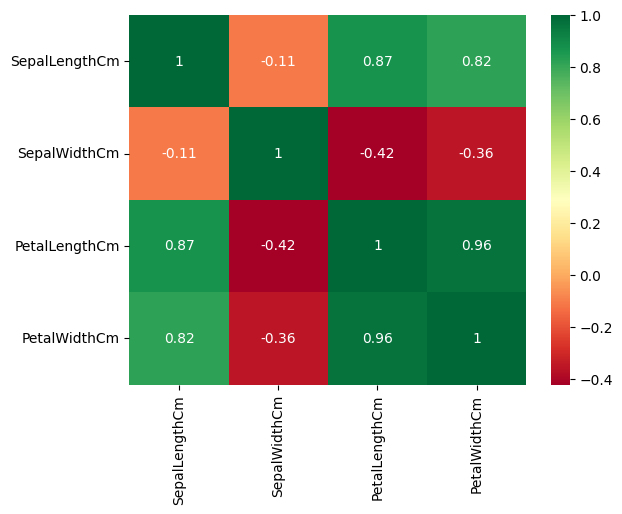

In [ ]:
sns.heatmap(iris_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

1. sepal length has high correlation with petal length and petal width
2. whereas sepal width has negative correlation with petal length and petal width

**DATA MODELLING**

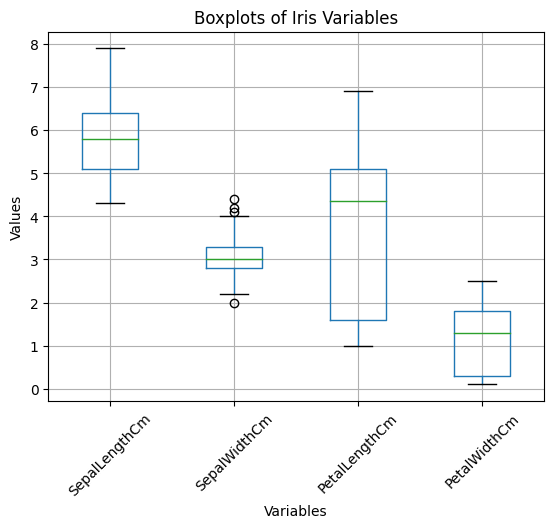

In [ ]:
variables=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create a figure and axes for the boxplot
fig, ax = plt.subplots()

# Plot the boxplots for each variable
iris_df[variables].boxplot(ax=ax)

# Set the title and labels
ax.set_title('Boxplots of Iris Variables')
ax.set_xlabel('Variables')
plt.xticks(rotation=45)
ax.set_ylabel('Values')

# Display the plot
plt.show()


we do not have much outlier in other except sepal width


In [ ]:
#rescaling the attributes using standard scaler

import sklearn
from sklearn.preprocessing import StandardScaler

iris_df_scaled=iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
scaler=StandardScaler()

iris_df_scaled=scaler.fit_transform(iris_df_scaled)
iris_df_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
iris_df_scaled.shape

(150, 4)

In [ ]:
#converting numpy array to dataframe

iris_df_scaled=pd.DataFrame(iris_df_scaled)
iris_df_scaled.columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

iris_df_scaled.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


**To evaluate cluster tendency using hopkins statistic**

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
#using Hopkins statistic to assess the clustering tendency or the degree of clusterability in the dataset
hopkins(iris_df_scaled)

0.834076244782318

Hopkins statistic of the data is 0.8450345425749723 hence it is high tendency of cluster

**To find the optimum no. of clusters we will use Elbow method or silhoutte score method**

In [ ]:
# k-means with some random k
kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 0)
kmeans.fit(iris_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.labels_

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans

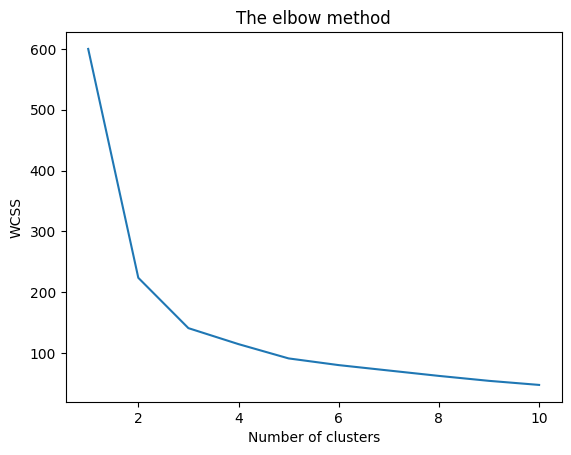

In [ ]:
x = iris_df_scaled.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph,
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimum cluster is 3 as the elbow of the curve is at 3 as per the elbow curve

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of. (High is good)

$q$ is the mean intra-cluster distance to all the points in its own cluster.(low is good)

* The value of the silhouette score range lies between -1 to 1.

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:

for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_df_scaled)
    cluster_labels = kmeans.labels_

    # Silhouette score
    silhouette_avg = silhouette_score(iris_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



For n_clusters=2, the silhouette score is 0.580184463257396
For n_clusters=3, the silhouette score is 0.4589717867018717
For n_clusters=4, the silhouette score is 0.38724679456128813
For n_clusters=5, the silhouette score is 0.34805236242232845
For n_clusters=6, the silhouette score is 0.32503406068216806
For n_clusters=7, the silhouette score is 0.3277897305400625
For n_clusters=8, the silhouette score is 0.33833525871498515
For n_clusters=9, the silhouette score is 0.35444765315018933
For n_clusters=10, the silhouette score is 0.36325967539469817


Looking at both the metrics we will choose to go with cluster=3

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(iris_df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
y_kmeans=kmeans.fit_predict(iris_df_scaled)

In [ ]:
#assign the labels to original dataframe
iris_df['cluster_id'] = kmeans.labels_
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
# Visualising all 3 clusters w.r.t. Sepal Features:

fig = px.scatter(iris_df, x='SepalLengthCm', y='SepalWidthCm', trendline = 'ols', hover_name = 'Species', color='cluster_id',
                title = "Sepal Features w.r.t Iris Species", width = 1000, height = 700)
fig.show()

In [ ]:
# Visualising all 3 clusters w.r.t. Petal Features:

fig = px.scatter(iris_df, x='PetalLengthCm', y='PetalWidthCm', trendline = 'ols', hover_name = 'Species', color='cluster_id',
                title = "Sepal Features w.r.t Iris Species", width = 1000, height = 700)
fig.show()

1. iris setosa have unique petal and sepal length and all the datapoints of setosa belongs to cluster 1
2. the petal and sepal length features of versicolor and virginica have some overlappings
3. Iris virginica has  the highest petal length

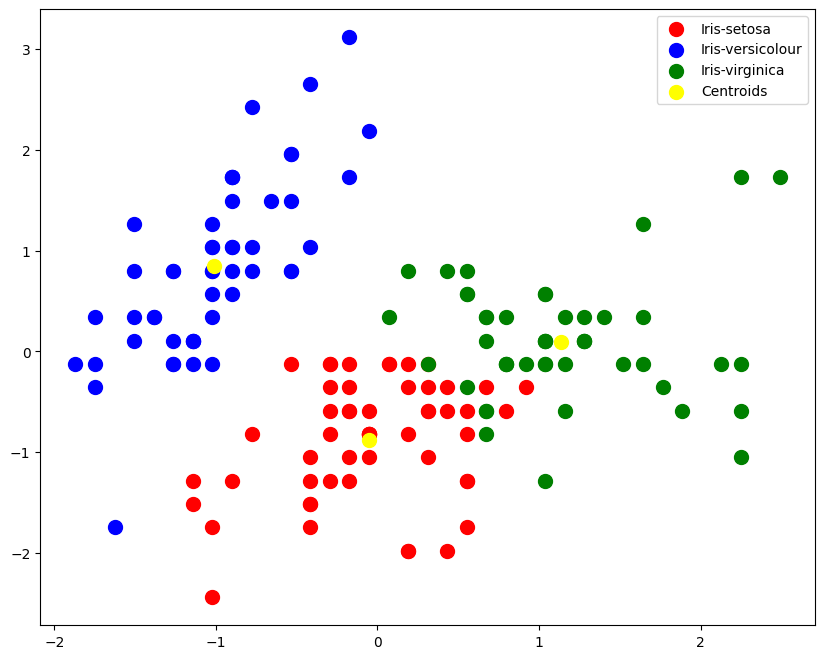

In [ ]:
x =  iris_df_scaled.iloc[:, [0, 1, 2, 3]].values

# Visualising the clusters - On the first two columns

plt.figure(figsize = [10,8])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

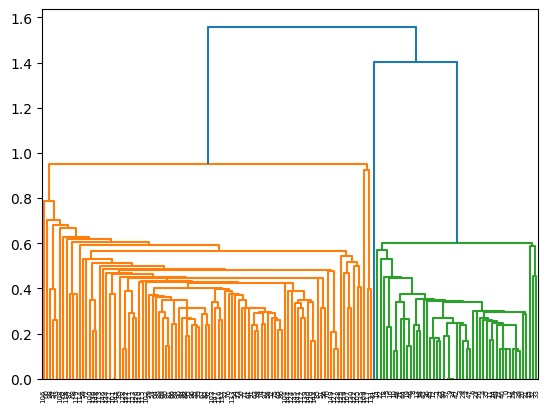

In [ ]:
# single linkage
mergings = linkage(iris_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

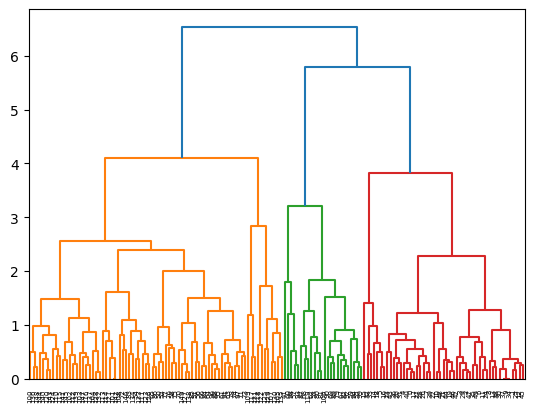

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

mergings = linkage(iris_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


In [ ]:
iris_df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,0
96,5.7,2.9,4.2,1.3,Iris-versicolor,0
97,6.2,2.9,4.3,1.3,Iris-versicolor,0
98,5.1,2.5,3.0,1.1,Iris-versicolor,0
